# Customer Churn Prediction

## Project Overview

This project aims to predict customer churn in a telecom company using machine learning techniques. Customer churn, the phenomenon of customers discontinuing their service, is a critical issue for telecommunication companies as it directly impacts revenue and profitability. By accurately identifying customers at high risk of churn, the company can proactively implement retention strategies, thereby reducing customer attrition and improving overall business performance.



## Dataset Description

The dataset contains information about a telecom company's customers, including various features that might influence their decision to churn. Each row represents a customer, and the columns contain customer attributes.

**Key Features Include:**
* **Demographic Info:** `gender`, `SeniorCitizen`, `Partner`, `Dependents`
* **Service Info:** `PhoneService`, `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`
* **Billing & Contract Info:** `Contract`, `PaperlessBilling`, `PaymentMethod`, `MonthlyCharges`, `TotalCharges`
* **Customer Lifecycle:** `tenure` (number of months with the company)
* **Target Variable:** `Churn` (Yes/No)

# Data Loading and Intial Check

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [90]:
df = pd.read_csv("/content/customer_churn.csv")

In [91]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,CallService,MultipleConnections,InternetConnection,OnlineSecurity,...,DeviceProtectionService,TechnicalHelp,OnlineTV,OnlineMovies,Agreement,BillingMethod,PaymentMethod,MonthlyServiceCharges,TotalAmount,Churn
0,2907-ILJBN,Female,0,Yes,Yes,11.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.60,233.90,No
1,3896-RCYYE,Female,0,No,No,67.0,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),53.40,3579.15,No
2,9764-REAFF,Female,0,Yes,No,59.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),18.40,1057.85,No
3,6651-RLGGM,Male,0,Yes,Yes,67.0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,26.30,1688.90,No
4,5879-SESNB,Female,0,No,No,11.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,75.25,888.65,No


In [92]:
df.head().T

,0,1,2,3,4
customerID,2907-ILJBN,3896-RCYYE,9764-REAFF,6651-RLGGM,5879-SESNB
gender,Female,Female,Female,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,Yes,Yes,No
Dependents,Yes,No,No,Yes,No
tenure,11.0,67.0,59.0,67.0,11.0
CallService,Yes,No,Yes,Yes,Yes
MultipleConnections,No,No phone service,No,Yes,Yes
InternetConnection,No,DSL,No,No,Fiber optic
OnlineSecurity,No internet service,No,No internet service,No internet service,No


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12335 entries, 0 to 12334
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customerID               12335 non-null  object 
 1   gender                   12335 non-null  object 
 2   SeniorCitizen            12335 non-null  int64  
 3   Partner                  12335 non-null  object 
 4   Dependents               12335 non-null  object 
 5   tenure                   12335 non-null  float64
 6   CallService              12335 non-null  object 
 7   MultipleConnections      12335 non-null  object 
 8   InternetConnection       12335 non-null  object 
 9   OnlineSecurity           12335 non-null  object 
 10  OnlineBackup             12335 non-null  object 
 11  DeviceProtectionService  12335 non-null  object 
 12  TechnicalHelp            12335 non-null  object 
 13  OnlineTV                 12335 non-null  object 
 14  OnlineMovies          

In [94]:
df.nunique()

,0
customerID,5590
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,3569
CallService,2
MultipleConnections,3
InternetConnection,3
OnlineSecurity,3


In [95]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
CallService,0
MultipleConnections,0
InternetConnection,0
OnlineSecurity,0


# Data Preprocesing

Handling Missing Values

In [96]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
CallService,0
MultipleConnections,0
InternetConnection,0
OnlineSecurity,0


Handling Duplicated Rows

In [97]:
print("Number of duplicated rows: ", df.duplicated().sum())

Number of duplicated rows:  3007


In [98]:
df = df.drop_duplicates()
df.shape

(9328, 21)

In [99]:
#Dropping unnecessary columns
df = df.drop("customerID", axis = 1)

In [100]:
#Coverting data types of columns
df.SeniorCitizen = df.SeniorCitizen.astype(str)

In [101]:
#Replacing values in the dataset
df['SeniorCitizen'] = df['SeniorCitizen'].replace({"0": 'No', "1": 'Yes'})

In [102]:
df['SeniorCitizen'].unique()

array(['No', 'Yes'], dtype=object)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9328 entries, 0 to 12334
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   9328 non-null   object 
 1   SeniorCitizen            9328 non-null   object 
 2   Partner                  9328 non-null   object 
 3   Dependents               9328 non-null   object 
 4   tenure                   9328 non-null   float64
 5   CallService              9328 non-null   object 
 6   MultipleConnections      9328 non-null   object 
 7   InternetConnection       9328 non-null   object 
 8   OnlineSecurity           9328 non-null   object 
 9   OnlineBackup             9328 non-null   object 
 10  DeviceProtectionService  9328 non-null   object 
 11  TechnicalHelp            9328 non-null   object 
 12  OnlineTV                 9328 non-null   object 
 13  OnlineMovies             9328 non-null   object 
 14  Agreement                932

# Exploratory Data Analysis

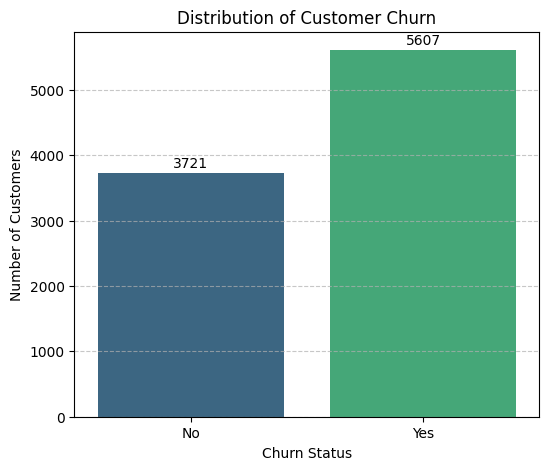

In [104]:
# Displaying the distribution of customer churn
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='Churn', data=df, palette='viridis', hue='Churn', legend=False) # 'hue' added to resolve warning

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 40,
            '{:1.0f}'.format(height),
            ha='center', va='bottom')

plt.title('Distribution of Customer Churn')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

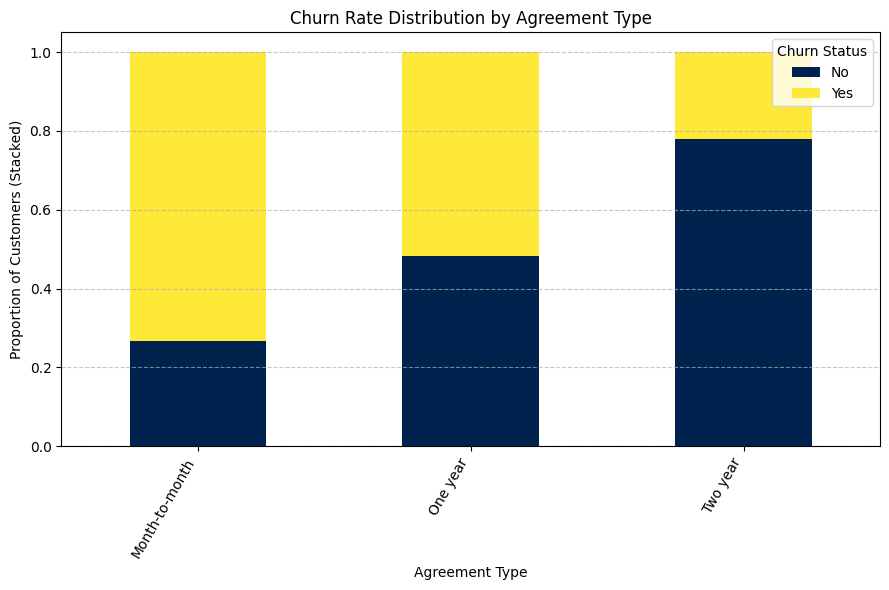

In [105]:
# Displaying the churn rate within each agreement type
plt.figure(figsize=(9, 6))
churn_by_agreement = df.groupby('Agreement')['Churn'].value_counts(normalize=True).unstack()
churn_by_agreement.plot(kind='bar', stacked=True, figsize=(9, 6), cmap='cividis', ax=plt.gca())

plt.title('Churn Rate Distribution by Agreement Type')
plt.xlabel('Agreement Type')
plt.ylabel('Proportion of Customers (Stacked)')
plt.xticks(rotation=60, ha='right')
plt.legend(title='Churn Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

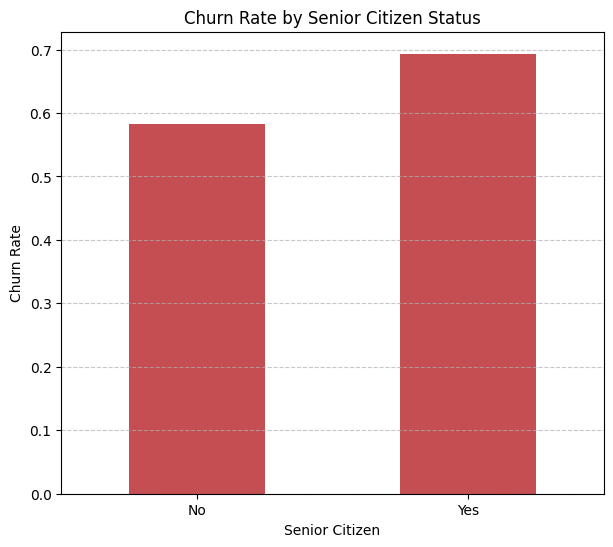

In [106]:
# Displaying the churn rate based on Senior Citizen status

plt.figure(figsize=(7, 6))
senior_churn_rate_df = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()
ax = senior_churn_rate_df['Yes'].plot(kind='bar', color=sns.color_palette('deep')[3])

plt.title('Churn Rate by Senior Citizen Status')
plt.xlabel('Senior Citizen')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

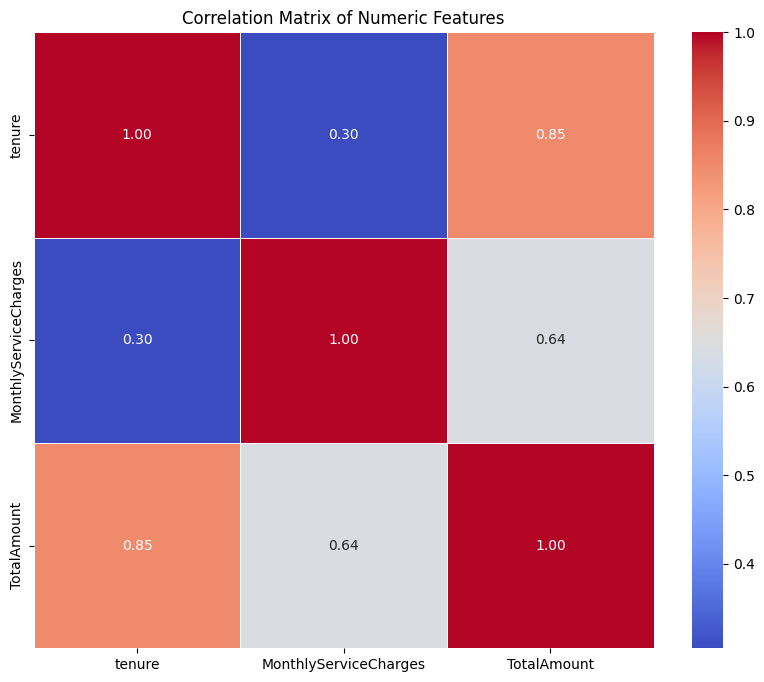

In [107]:
# Displaying the correlation matrix of numeric features
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

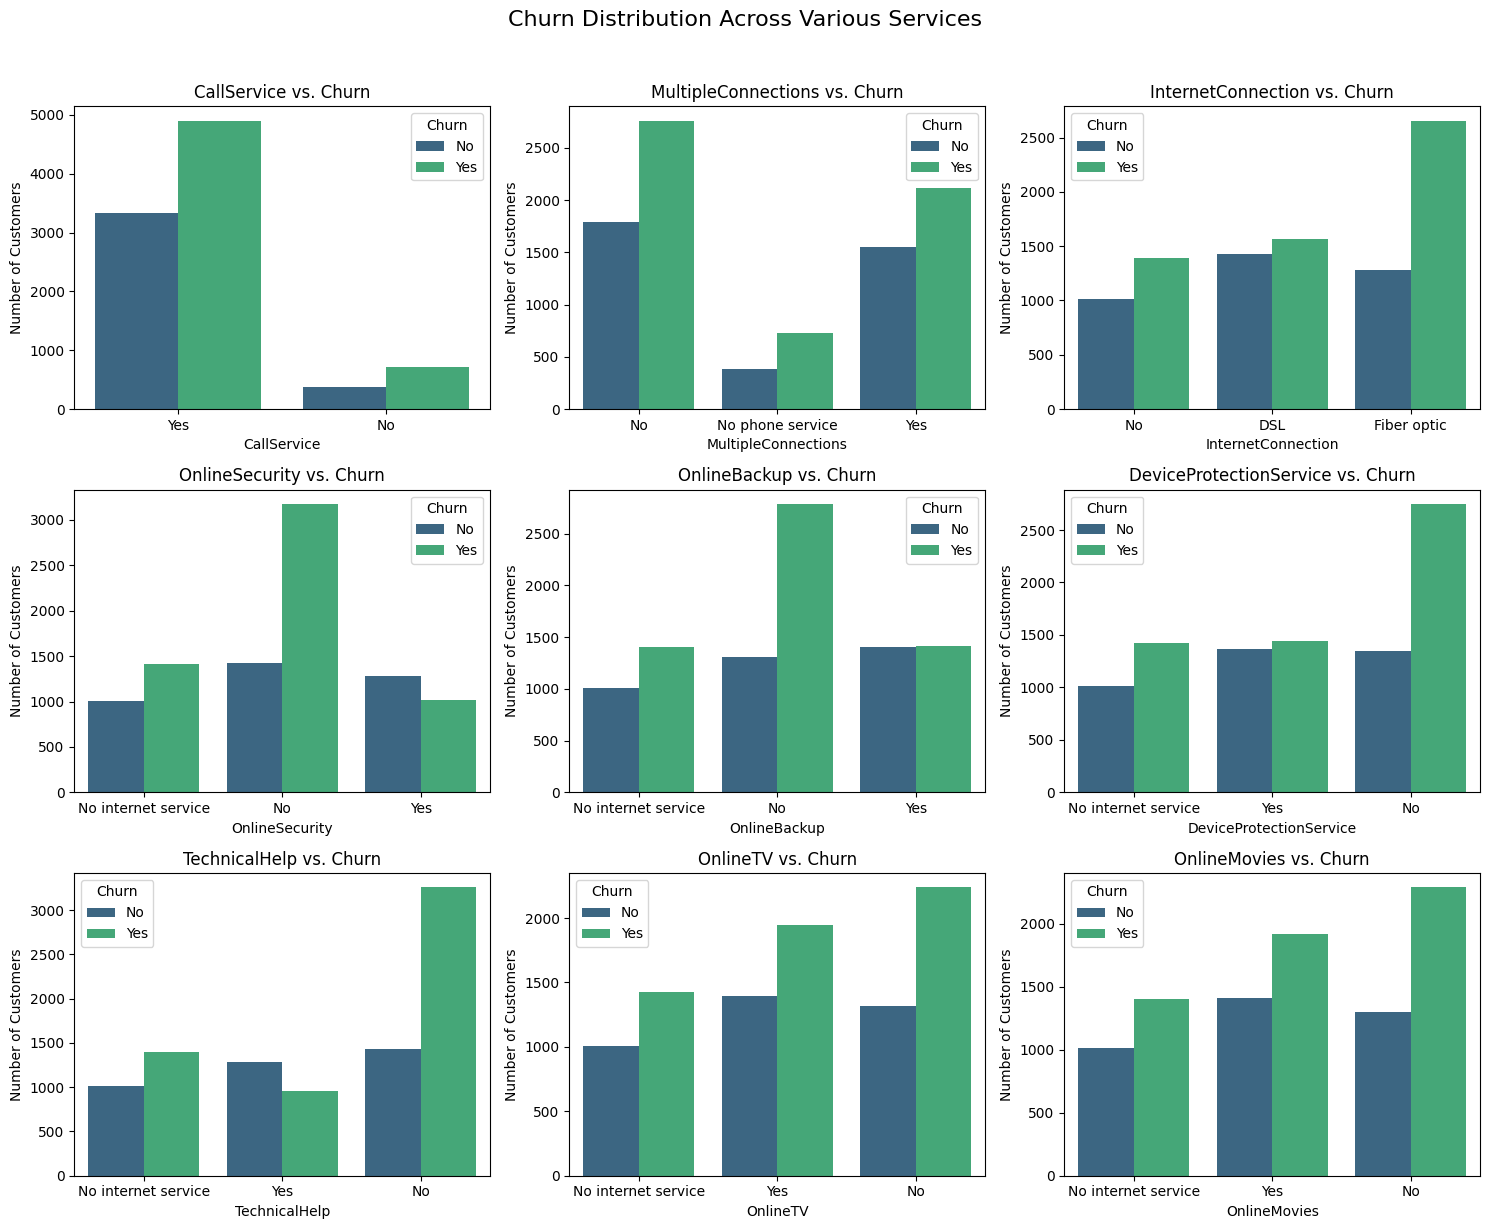

In [108]:
import math # Import math for ceil function
# Displaying how various services impact churn, arranged in rows with 3 graphs each
# List of service-related columns to analyze
service_columns = [
    'CallService', 'MultipleConnections', 'InternetConnection',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtectionService',
    'TechnicalHelp', 'OnlineTV', 'OnlineMovies'
]

n_cols = 3
n_rows = math.ceil(len(service_columns) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4), layout='tight')
axes = axes.flatten()

for i, col_name in enumerate(service_columns):
    ax = axes[i]
    sns.countplot(x=col_name, hue='Churn', data=df, palette='viridis', ax=ax)
    ax.set_title(f'{col_name} vs. Churn')
    ax.set_xlabel(col_name)
    ax.set_ylabel('Number of Customers')
    ax.legend(title='Churn')

plt.suptitle('Churn Distribution Across Various Services', y=1.02, fontsize=16) # Overall title
plt.show()

According to Churn Distribution for various services these are the following insights:-

* **CallService:** While fundamental, not having CallService is a very strong churn indicator, with almost all non-subscribers churning.
* **MultipleConnections:** Customers with multiple connections show a slightly lower churn propensity compared to single-connection users, suggesting increased stickiness.
* **InternetConnection:** **Fiber optic internet is the most significant churn driver**, with a substantially higher proportion of churned customers compared to DSL or no internet service.
* **OnlineSecurity:** Subscribing to OnlineSecurity acts as a strong churn mitigator; customers with this service are notably less likely to churn.
* **OnlineBackup:** Similar to OnlineSecurity, having OnlineBackup significantly reduces the likelihood of a customer churning.
* **DeviceProtectionService:** Customers with Device Protection Service show lower churn rates, indicating this service also contributes to customer retention.
* **TechnicalHelp:** Access to Technical Help appears to be a crucial churn mitigator; customers utilizing this service churn significantly less.
* **OnlineTV:** While beneficial, OnlineTV has a moderate impact on reducing churn compared to security or tech support services.
* **OnlineMovies:** Similar to OnlineTV, subscribing to Online Movies shows a moderate but positive effect on customer retention.

# Model Training and Evaluation

In [109]:
X = df.drop("Churn", axis=1)
y = df.Churn

In [110]:
tts = train_test_split
X_train, X_test, y_train, y_test = tts(X,y)

In [111]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6996, 19) (2332, 19) (6996,) (2332,)


In [112]:
sc = StandardScaler()

In [113]:
floatlst = list(df.select_dtypes(["float64"]).columns)
len(floatlst)

3

In [114]:
X_train_std = sc.fit_transform(X_train[floatlst])
X_test_std = sc.transform(X_test[floatlst])
print(X_train_std.shape, X_test_std.shape)

(6996, 3) (2332, 3)


In [115]:
X_train_df = pd.DataFrame(X_train_std, columns = floatlst)
X_test_df = pd.DataFrame(X_test_std, columns = floatlst)
print(X_train_df.shape, X_test_df.shape, df.shape)

(6996, 3) (2332, 3) (9328, 20)


In [116]:
X_train_obj = X_train.drop(columns = floatlst)
X_test_obj = X_test.drop(columns = floatlst)
print(X_train_obj.shape, X_test_obj.shape)

(6996, 16) (2332, 16)


In [117]:
X_train_dm = pd.get_dummies(X_train_obj, drop_first = True).reset_index()
X_test_dm = pd.get_dummies(X_test_obj, drop_first = True).reset_index()
print(X_train_dm.shape, X_test_dm.shape)

(6996, 28) (2332, 28)


In [118]:
X_train = pd.concat([X_train_dm, X_train_df], axis = 1)
X_test = pd.concat([X_test_dm, X_test_df],axis = 1)
print(X_train.shape, X_test.shape)

(6996, 31) (2332, 31)


### Logistic Regression

In [119]:
log_model = LogisticRegression(max_iter = 5000)
log_model.fit(X_train,y_train)
log_preds = log_model.predict(X_test)

In [120]:
accuracy_score(log_preds, y_test)

1.0

In [121]:
print(classification_report(log_preds, y_test))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00       924
         Yes       1.00      1.00      1.00      1408

    accuracy                           1.00      2332
   macro avg       1.00      1.00      1.00      2332
weighted avg       1.00      1.00      1.00      2332



# Project Conclusion

This project successfully developed a robust customer churn prediction system for a telecom company, leveraging detailed customer data to identify at-risk individuals. The developed model provides actionable insights, enabling the company to proactively target customers with tailored retention strategies, ultimately minimizing customer attrition and maximizing long-term revenue.